In [1]:
from __future__ import absolute_import, division, print_function

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

%matplotlib inline

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)



1.13.1


In [2]:
data = pd.read_csv("C:/Users/kpleu/Desktop/Git/Kaggle_Digit_Recognizer/Data/train.csv")
#submision = pd.read_csv("C:/Users/kpleu/Desktop/Git/Kaggle_Digit_Recognizer/Data/test.csv")

In [3]:
#Lables and Images for the training set
data_labels = data["label"]
data_images = data.drop(labels = ["label"],axis = 1) 
#Reshape images to 28*28
data_images = data_images.values.reshape(-1,28,28)

# Set the random seed
random_seed = 2

# Split the train and the validation set for the fitting
train_images, test_images, train_labels,  test_labels = train_test_split(data_images, data_labels, test_size = 0.10, random_state=random_seed)
train_labels=np.asarray(train_labels)
test_labels=np.asarray(test_labels)

In [4]:
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [5]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [10]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [11]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
model.fit(train_images, train_labels, epochs=7)

Epoch 1/7
37800/37800 [==============================] - 3s 78us/sample - loss: 0.3079 - acc: 0.9128
Epoch 2/7
37800/37800 [==============================] - 3s 67us/sample - loss: 0.1363 - acc: 0.9601
Epoch 3/7
37800/37800 [==============================] - 2s 66us/sample - loss: 0.0918 - acc: 0.9736
Epoch 4/7
37800/37800 [==============================] - 3s 67us/sample - loss: 0.0686 - acc: 0.9790
Epoch 5/7
37800/37800 [==============================] - 3s 66us/sample - loss: 0.0529 - acc: 0.9836
Epoch 6/7
37800/37800 [==============================] - 3s 69us/sample - loss: 0.0403 - acc: 0.9876
Epoch 7/7
37800/37800 [==============================] - 3s 67us/sample - loss: 0.0328 - acc: 0.9903


In [13]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

4200/4200 [==============================] - 0s 47us/sample - loss: 0.0975 - acc: 0.9702
Test accuracy: 0.9702381


In [14]:
predictions = model.predict(test_images)
prediction_array=np.argmax(predictions,axis = 1) 

In [15]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)
  
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [16]:
fail_prediction = (prediction_array - test_labels != 0)

In [17]:
fail_prediction_location=np.where(fail_prediction)

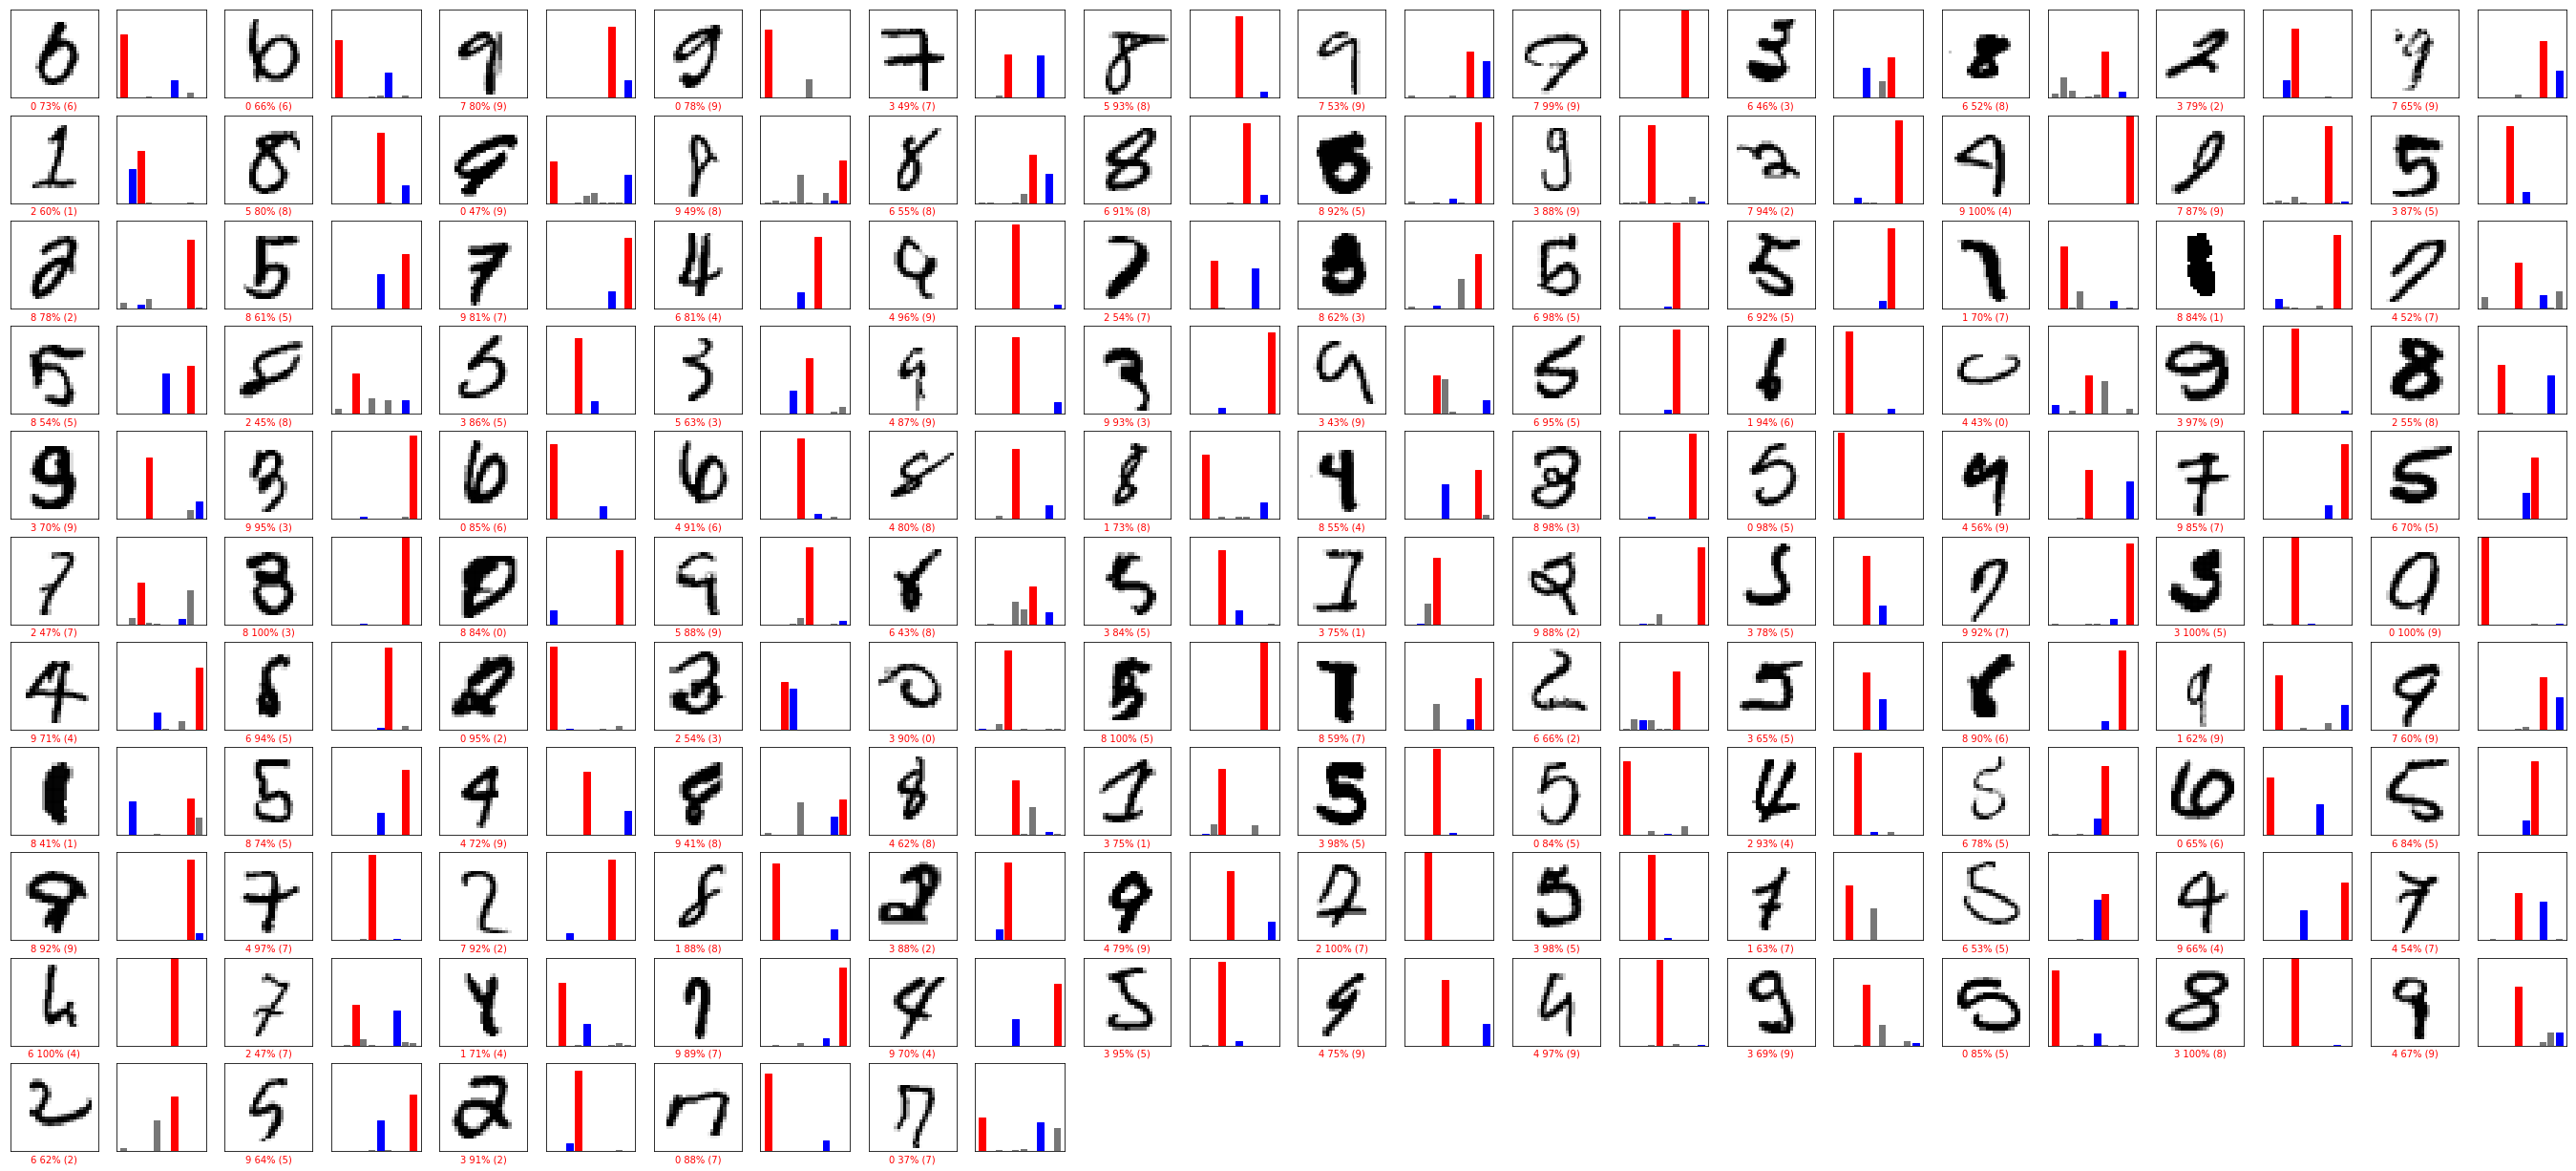

In [18]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 12
num_cols = 12
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(min(num_images,sum(fail_prediction))):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(fail_prediction_location[0][i-1], predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(fail_prediction_location[0][i-1], predictions, test_labels)
plt.show()

In [8]:
extended_data_images=np.zeros((42000, 56 ,28))


In [9]:
for i in range(len(data_labels)-1):
    extended_data_images[i]=np.concatenate((data_images[i],np.transpose(data_images[i])),axis=0)

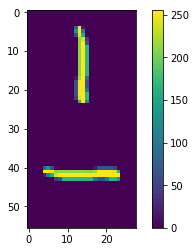

In [12]:
plt.figure()
plt.imshow(extended_data_images[1000])
plt.colorbar()
plt.grid(False)
plt.show()

In [13]:
# Split the train and the validation set for the fitting
train_images, test_images, train_labels,  test_labels = train_test_split(extended_data_images, data_labels, test_size = 0.10, random_state=random_seed)
train_labels=np.asarray(train_labels)
test_labels=np.asarray(test_labels)

In [14]:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [15]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(56, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

Instructions for updating:
Colocations handled automatically by placer.


In [100]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [101]:
model.fit(train_images, train_labels, epochs=7)

Epoch 1/7
37800/37800 [==============================] - 4s 112us/sample - loss: 0.2666 - acc: 0.9224
Epoch 2/7
37800/37800 [==============================] - 4s 100us/sample - loss: 0.1206 - acc: 0.9634
Epoch 3/7
37800/37800 [==============================] - 4s 94us/sample - loss: 0.0806 - acc: 0.9754
Epoch 4/7
37800/37800 [==============================] - 4s 100us/sample - loss: 0.0604 - acc: 0.9811
Epoch 5/7
37800/37800 [==============================] - 4s 105us/sample - loss: 0.0480 - acc: 0.9848
Epoch 6/7
37800/37800 [==============================] - 4s 98us/sample - loss: 0.0347 - acc: 0.9896
Epoch 7/7
37800/37800 [==============================] - 4s 99us/sample - loss: 0.0305 - acc: 0.9897


In [102]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

4200/4200 [==============================] - 0s 66us/sample - loss: 0.0958 - acc: 0.9724
Test accuracy: 0.97238094


In [77]:
predictions = model.predict(test_images)

In [78]:
prediction_array=np.argmax(predictions,axis = 1) 

In [80]:
fail_prediction = (prediction_array - test_labels != 0)

In [81]:
fail_prediction_location=np.where(fail_prediction)

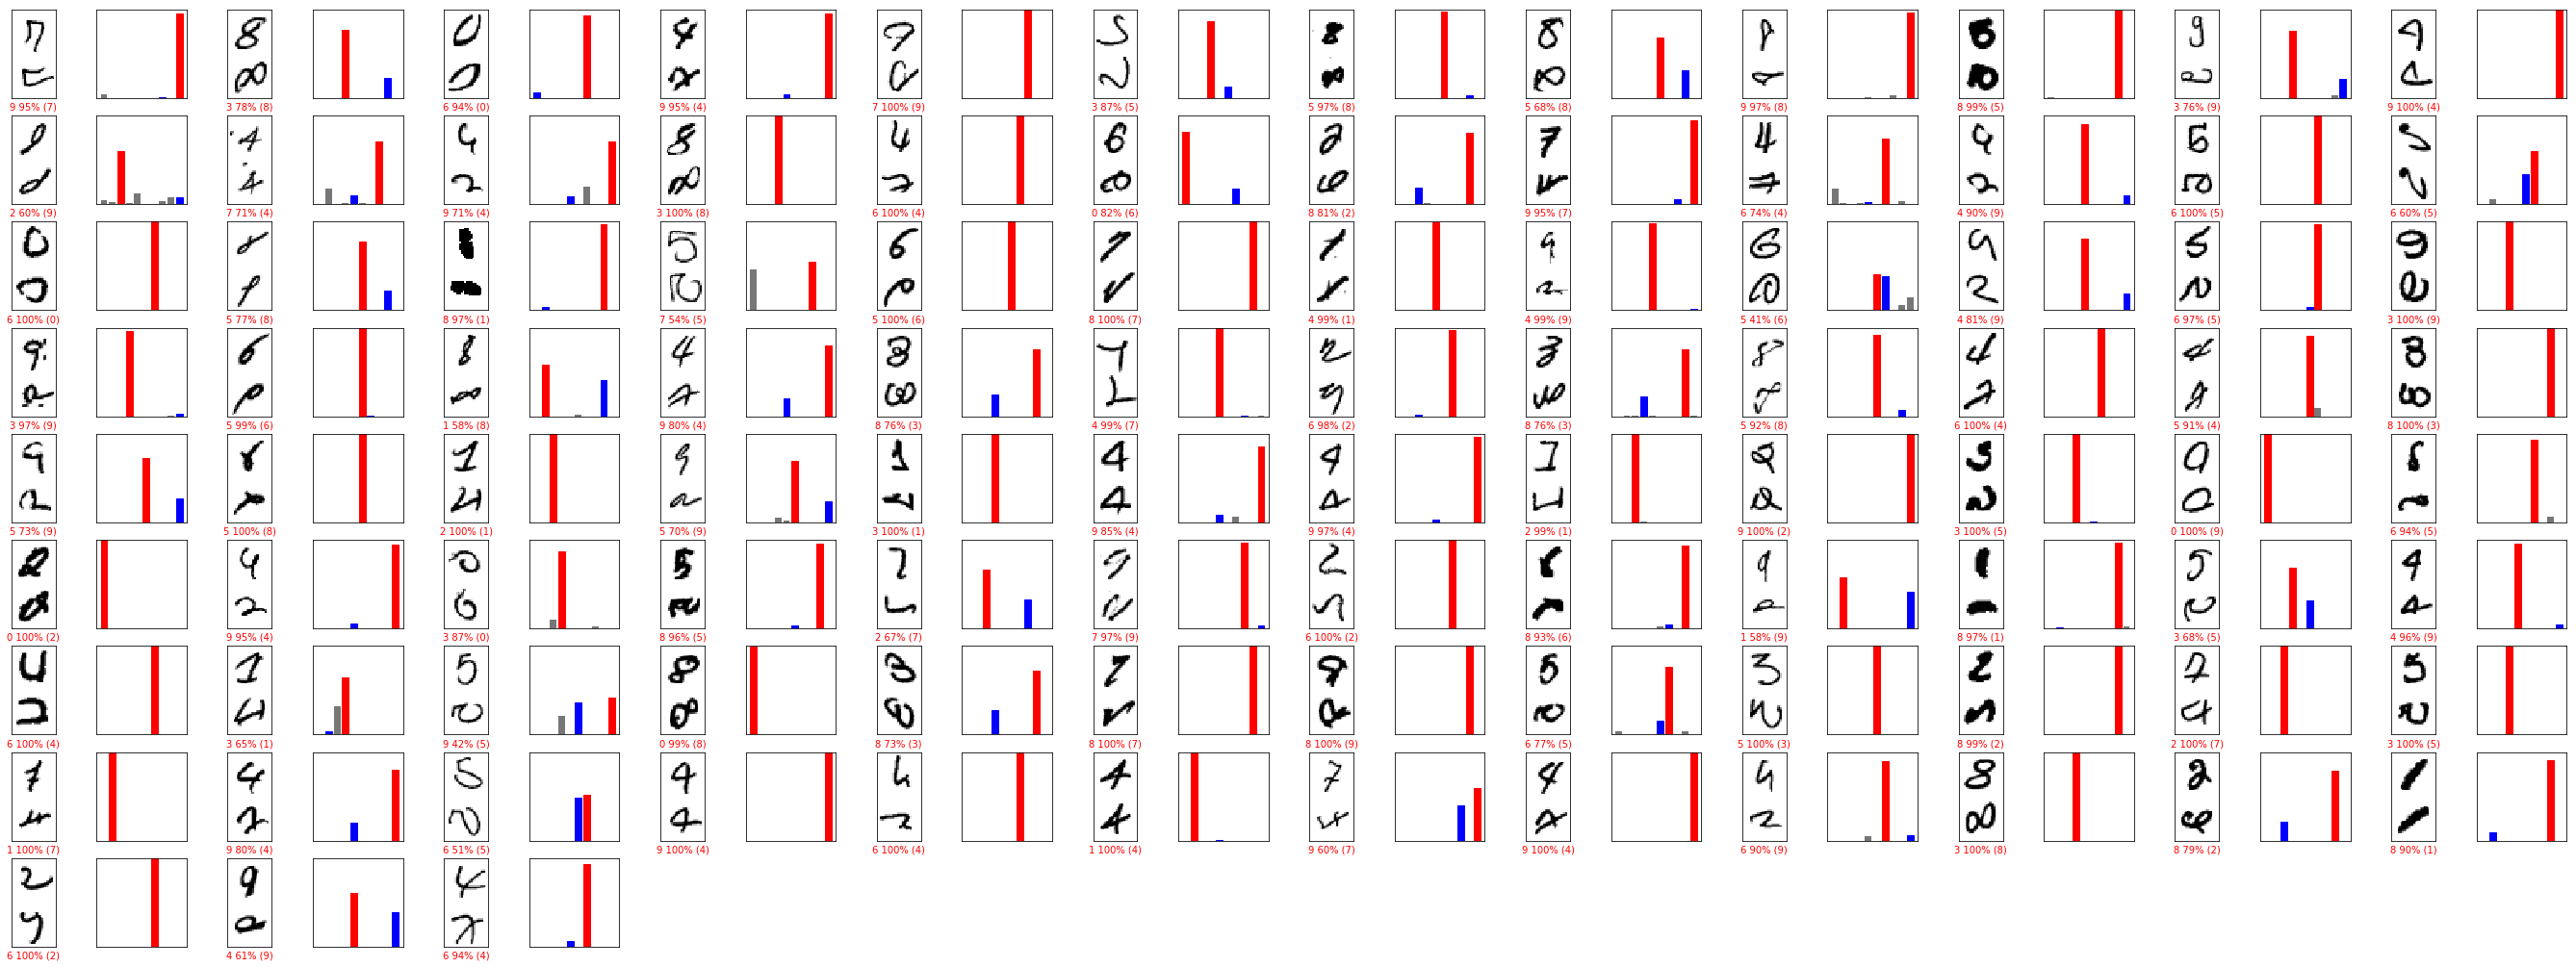

In [82]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 12
num_cols = 12
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(min(num_images,sum(fail_prediction))):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(fail_prediction_location[0][i-1], predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(fail_prediction_location[0][i-1], predictions, test_labels)
plt.show()

Second model, with dropout

In [18]:
model_1 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [19]:
model_1.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [25]:
model_1.fit(train_images, train_labels, epochs=10)

Epoch 1/10
37800/37800 [==============================] - 5s 139us/sample - loss: 0.0387 - acc: 0.9869
Epoch 2/10
37800/37800 [==============================] - 5s 137us/sample - loss: 0.0301 - acc: 0.9897
Epoch 3/10
37800/37800 [==============================] - 5s 139us/sample - loss: 0.0284 - acc: 0.9902
Epoch 4/10
37800/37800 [==============================] - 5s 140us/sample - loss: 0.0267 - acc: 0.9906
Epoch 5/10
37800/37800 [==============================] - 5s 138us/sample - loss: 0.0222 - acc: 0.9925
Epoch 6/10
37800/37800 [==============================] - 5s 137us/sample - loss: 0.0204 - acc: 0.9935
Epoch 7/10
37800/37800 [==============================] - 5s 145us/sample - loss: 0.0164 - acc: 0.9948
Epoch 8/10
37800/37800 [==============================] - 5s 138us/sample - loss: 0.0187 - acc: 0.9934
Epoch 9/10
37800/37800 [==============================] - 5s 138us/sample - loss: 0.0141 - acc: 0.9951
Epoch 10/10
37800/37800 [==============================] - 5s 140us/sampl

In [26]:
test_loss, test_acc = model_1.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

4200/4200 [==============================] - 0s 36us/sample - loss: 0.0864 - acc: 0.9800
Test accuracy: 0.98


In [27]:
predictions = model_1.predict(test_images)
prediction_array=np.argmax(predictions,axis = 1) 
fail_prediction = (prediction_array - test_labels != 0)
fail_prediction_location=np.where(fail_prediction)

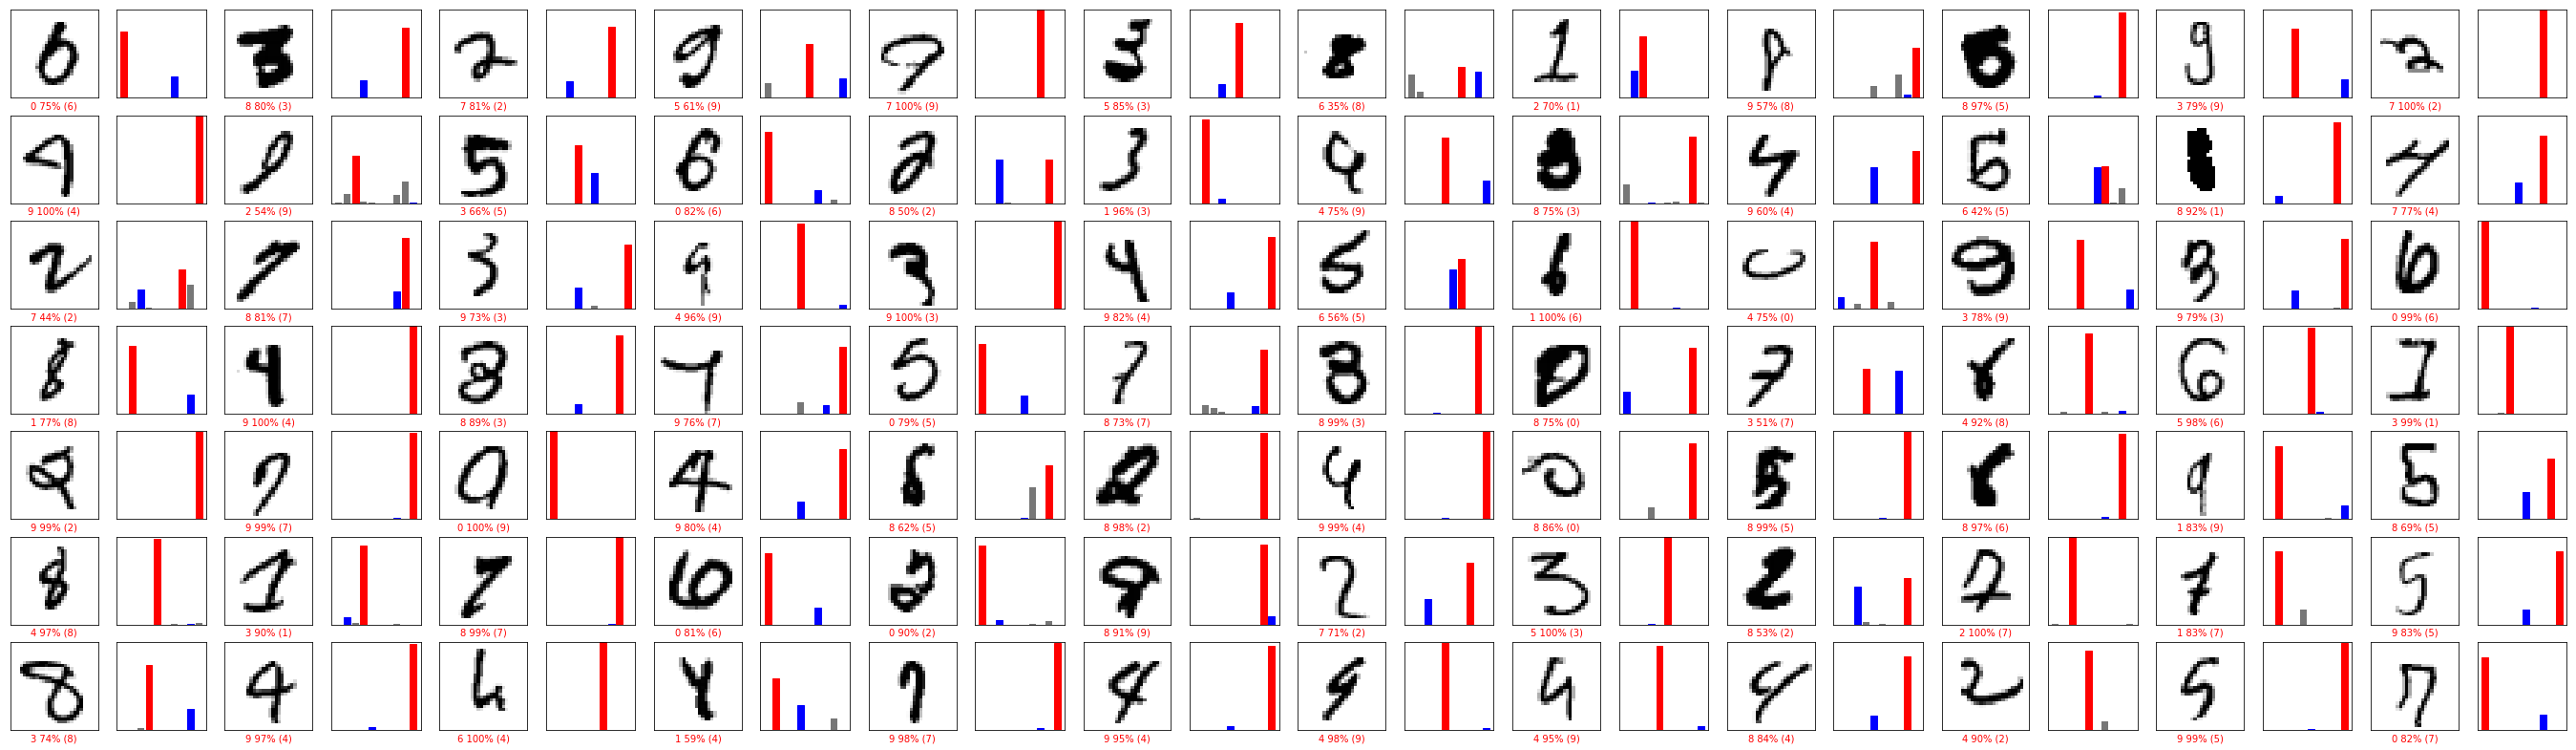

In [28]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 12
num_cols = 12
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(min(num_images,sum(fail_prediction))):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(fail_prediction_location[0][i-1], predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(fail_prediction_location[0][i-1], predictions, test_labels)
plt.show()